# Trabajo Práctico 4 - Procesamiento de Imágenes
- Francisco Devaux
- Agustín Yornet

## Ejercicio 1
> Transformada de Fourier (FT) en 2D: Realiza la transformada de Fourier de una imagen en escala de grises utilizando la función fft2 de NumPy. Muestra la imagen original y su transformada de Fourier (usando imshow de Matplotlib).

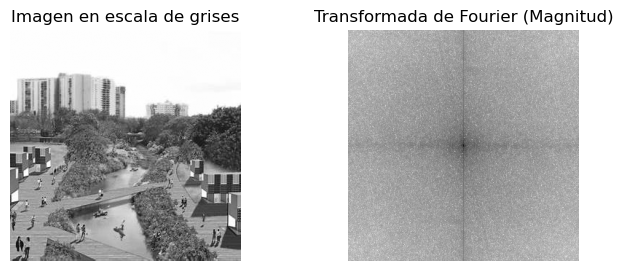

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('imagenes/paisaje1.jpg')
if img.ndim == 3:
    img_gray = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
else:
    img_gray = img

f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift) + 1)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray_r')
plt.title('Transformada de Fourier (Magnitud)')
plt.axis('off')

plt.show()

## Ejercicio 11

> Transformada de Fourier inversa: Realiza la transformada de Fourier inversa para recuperar la imagen original a partir de su versión filtrada en el dominio frecuencial. Compara la imagen original con la imagen recuperada.

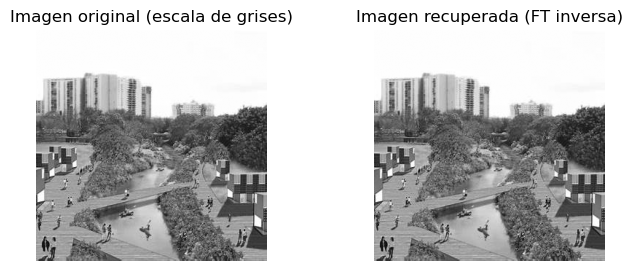

In [2]:
img_recuperada = np.fft.ifft2(f)
img_recuperada = np.real(img_recuperada)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagen original (escala de grises)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_recuperada, cmap='gray')
plt.title('Imagen recuperada (FT inversa)')
plt.axis('off')

plt.show()

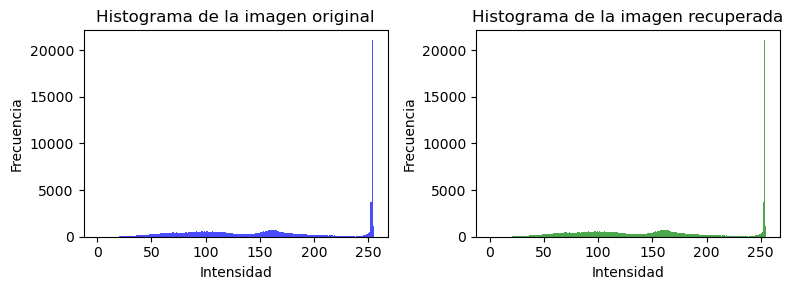

In [3]:
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.hist(img_gray.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Histograma de la imagen original')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(img_recuperada.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Histograma de la imagen recuperada')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Inciso a)

> ¿Cómo se visualiza la diferencia entre las frecuencias altas y bajas en una imagen? Ejercicio sugerido: Aplicar la Transformada de Fourier (DFT) y mostrar la magnitud del espectro centrado con fftshift.

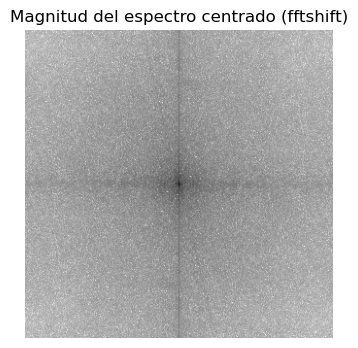

In [4]:
# Aplicar la Transformada de Fourier y mostrar la magnitud del espectro centrado con fftshift
fshift = np.fft.fftshift(np.fft.fft2(img_gray))
magnitude_spectrum = np.log(np.abs(fshift) + 1)

plt.figure(figsize=(4, 4))
plt.imshow(magnitude_spectrum, cmap='gray_r')
plt.title('Magnitud del espectro centrado (fftshift)')
plt.axis('off')
plt.show()

La parte central del espectro generalmente permite visualizar las frecuencias bajas, que varían lentamente y que representan cambios graduales, mientras que las frecuentcias altas se distribuyen alrededor del centro, y representan cambios más bruscos que varían con mayor rapidez.

### Inciso b)

>  ¿Qué ocurre si eliminamos las componentes de alta frecuencia de una imagen? ¿Y si eliminamos las de baja frecuencia? Ejercicio sugerido: Aplicar filtros pasa bajos y pasa altos en el dominio de la frecuencia y reconstruir la imagen con la transformada inversa.

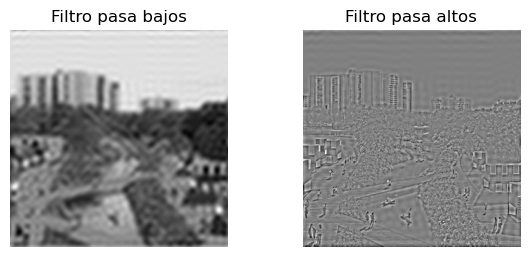

In [5]:
rows, cols = img_gray.shape
crow, ccol = rows // 2, cols // 2
radio = 25  # Valor ajustable para el radio del filtro

mask_lp = np.zeros((rows, cols), np.uint8)
mask_lp[crow-radio:crow+radio, ccol-radio:ccol+radio] = 1
fshift_lp = fshift * mask_lp
img_lp = np.fft.ifft2(np.fft.ifftshift(fshift_lp))
img_lp = np.real(img_lp)

mask_hp = np.ones((rows, cols), np.uint8)
mask_hp[crow-radio:crow+radio, ccol-radio:ccol+radio] = 0
fshift_hp = fshift * mask_hp
img_hp = np.fft.ifft2(np.fft.ifftshift(fshift_hp))
img_hp = np.real(img_hp)

plt.figure(figsize=(6, 5))

plt.subplot(2, 2, 1)
plt.imshow(img_lp, cmap='gray')
plt.title('Filtro pasa bajos')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_hp, cmap='gray')
plt.title('Filtro pasa altos')
plt.axis('off')

plt.tight_layout()
plt.show()

El flitro pasa bajos preserva las frecuencias bajas, atenuando las altas, y da como resultado un suavizado de la imagen. Por otro lado, el filtro pasa altos preserva las frecuencias altas, atenuando las bajas, y da como resultado un agudizamiento de la imagen, remarcando sobre todo los bordes al dejar los cambios bruscos que se producen.

### Inciso c)

> ¿Qué representa la fase de la transformada de Fourier de una imagen? ¿Qué ocurre si se conserva solo la fase o solo la magnitud? Ejercicio sugerido: Reconstruir una imagen usando solo la magnitud y fase de otra imagen, intercambiar fase y magnitud entre dos imágenes distintas.

#### Prueba 1: Reconstruir sólo con la Magnitud

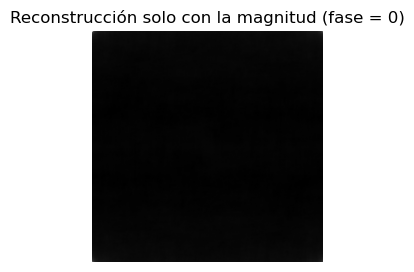

In [6]:
mag = np.abs(f)
fase_cero = np.zeros_like(f)
f_solo_magnitud = mag * np.exp(1j * fase_cero)
img_solo_magnitud = np.fft.ifft2(f_solo_magnitud)
img_solo_magnitud = np.real(img_solo_magnitud)

plt.figure(figsize=(3, 3))
plt.imshow(img_solo_magnitud, cmap='gray')
plt.title('Reconstrucción solo con la magnitud (fase = 0)')
plt.axis('off')
plt.show()

#### Prueba 2: Reconstruír sólo con la Fase

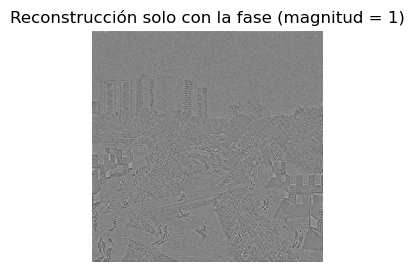

In [7]:
# Reconstrucción usando solo la fase (magnitud = 1)
fase = np.angle(f)
mag_uno = np.ones_like(f)
f_solo_fase = mag_uno * np.exp(1j * fase)
img_solo_fase = np.fft.ifft2(f_solo_fase)
img_solo_fase = np.real(img_solo_fase)

plt.figure(figsize=(3, 3))
plt.imshow(img_solo_fase, cmap='gray')
plt.title('Reconstrucción solo con la fase (magnitud = 1)')
plt.axis('off')
plt.show()

#### Prueba 3: Intercambiar fase y magnitud entre dos imágenes

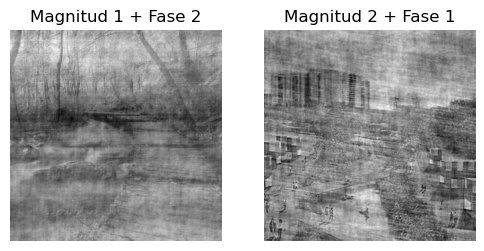

In [8]:
from skimage.transform import resize

# Cargar la segunda imagen y convertirla a escala de grises
img2 = imread('imagenes/paisaje2.jpg')
if img2.ndim == 3:
    img2_gray = np.dot(img2[..., :3], [0.2989, 0.5870, 0.1140])
else:
    img2_gray = img2

# Redimensionar img2_gray si es necesario para que coincida con img_gray
if img2_gray.shape != img_gray.shape:
    img2_gray = resize(img2_gray, img_gray.shape, preserve_range=True)

# Transformada de Fourier de la segunda imagen
f2 = np.fft.fft2(img2_gray)
mag2 = np.abs(f2)
fase2 = np.angle(f2)

# Intercambiar magnitud y fase
f_mag1_fase2 = mag * np.exp(1j * fase2)
f_mag2_fase1 = mag2 * np.exp(1j * fase)

img_mag1_fase2 = np.real(np.fft.ifft2(f_mag1_fase2))
img_mag2_fase1 = np.real(np.fft.ifft2(f_mag2_fase1))

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(img_mag1_fase2, cmap='gray')
plt.title('Magnitud 1 + Fase 2')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_mag2_fase1, cmap='gray')
plt.title('Magnitud 2 + Fase 1')
plt.axis('off')
plt.show()

### Inciso d)

>  ¿Por qué se centra la transformada de Fourier para su visualización? ¿Qué efecto tiene? Ejercicio sugerido: Mostrar el espectro de magnitud con y sin aplicar fftshift.

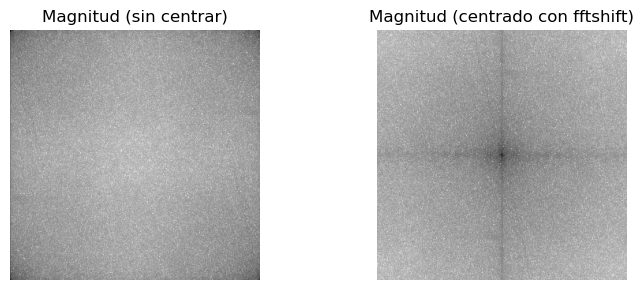

In [9]:
# Calcular la transformada de Fourier de la imagen original
f_img = np.fft.fft2(img_gray)

# Espectro de magnitud sin centrar (sin fftshift)
magnitude_no_shift = np.log(np.abs(f_img) + 1)

# Espectro de magnitud centrado (con fftshift)
magnitude_shift = np.log(np.abs(np.fft.fftshift(f_img)) + 1)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.imshow(magnitude_no_shift, cmap='gray_r')
plt.title('Magnitud (sin centrar)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_shift, cmap='gray_r')
plt.title('Magnitud (centrado con fftshift)')
plt.axis('off')

plt.tight_layout()
plt.show()

### Inciso e)

>  ¿Cómo se comporta la transformada de Fourier ante la traslación o rotación de una imagen? Ejercicio sugerido: Aplicar una traslación o rotación y comparar los espectros de magnitud y fase antes y después.

#### Rotación

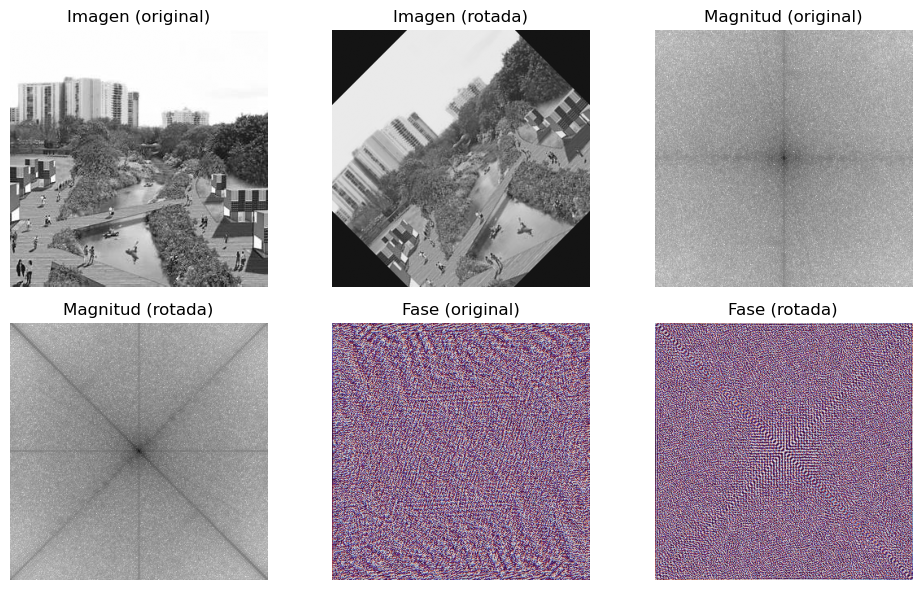

In [10]:
from scipy.ndimage import rotate

# Rotar la imagen original en escala de grises 45 grados
img_gray_rotada = rotate(img_gray, angle=45, reshape=False)

# Transformada de Fourier de la imagen rotada
f_rotada = np.fft.fft2(img_gray_rotada)
magnitude_rotada = np.log(np.abs(np.fft.fftshift(f_rotada)) + 1)
fase_rotada = np.angle(f_rotada)

# Espectro original
magnitude_original = np.log(np.abs(np.fft.fftshift(f)) + 1)
fase_original = np.angle(f)

plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagen (original)')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_gray_rotada, cmap='gray')
plt.title('Imagen (rotada)')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(magnitude_original, cmap='gray_r')
plt.title('Magnitud (original)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(magnitude_rotada, cmap='gray_r')
plt.title('Magnitud (rotada)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fase_original, cmap='twilight')
plt.title('Fase (original)')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(fase_rotada, cmap='twilight')
plt.title('Fase (rotada)')
plt.axis('off')

plt.tight_layout()
plt.show()

#### Traslación

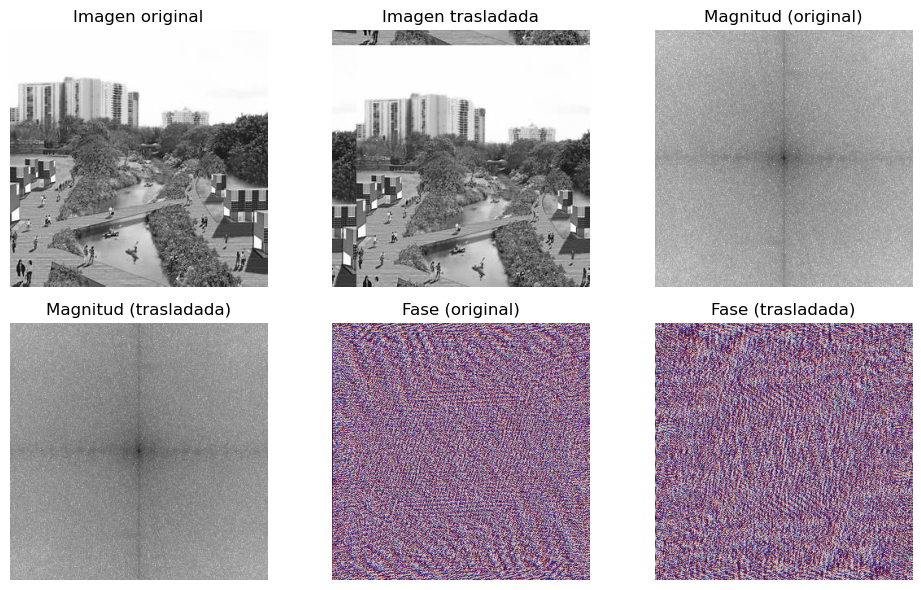

In [11]:
from scipy.ndimage import shift

# Trasladar la imagen original en escala de grises (por ejemplo, 30 píxeles a la derecha y 20 hacia abajo)
img_gray_trasladada = shift(img_gray, shift=(20, 30), mode='wrap')

# Transformada de Fourier de la imagen trasladada
f_trasladada = np.fft.fft2(img_gray_trasladada)
magnitude_trasladada = np.log(np.abs(np.fft.fftshift(f_trasladada)) + 1)
fase_trasladada = np.angle(f_trasladada)

plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_gray_trasladada, cmap='gray')
plt.title('Imagen trasladada')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(magnitude_original, cmap='gray_r')
plt.title('Magnitud (original)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(magnitude_trasladada, cmap='gray_r')
plt.title('Magnitud (trasladada)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fase_original, cmap='twilight')
plt.title('Fase (original)')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(fase_trasladada, cmap='twilight')
plt.title('Fase (trasladada)')
plt.axis('off')

plt.tight_layout()
plt.show()

### Inciso f)
> ¿Cómo se refleja una estructura periódica en el dominio frecuencial? Ejercicio sugerido: Usar imágenes sintéticas (rejillas, líneas) y observar cómo se representan sus frecuencias dominantes.

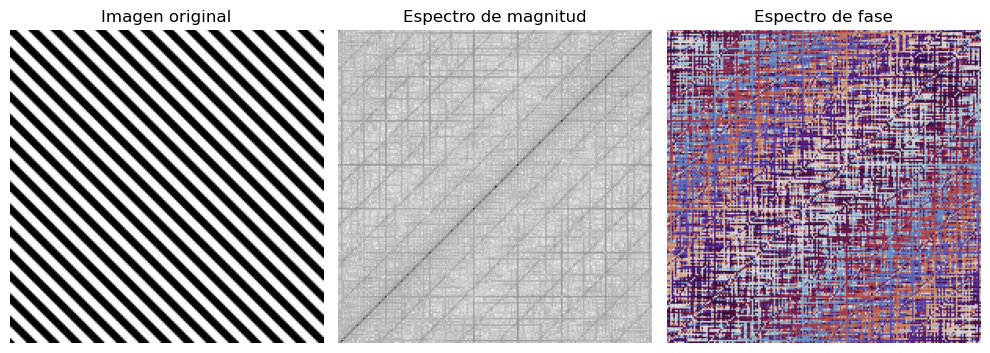

In [12]:
# Cargar la imagen y convertirla a escala de grises
img_pat = imread('imagenes/vector-line-seamless-pattern.jpg')
if img_pat.ndim == 3:
    img_pat_gray = np.dot(img_pat[..., :3], [0.2989, 0.5870, 0.1140])
else:
    img_pat_gray = img_pat

# Transformada de Fourier
f_pat = np.fft.fft2(img_pat_gray)
fshift_pat = np.fft.fftshift(f_pat)
magnitude_pat = np.log(np.abs(fshift_pat) + 1)
fase_pat = np.angle(fshift_pat)

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_pat_gray, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_pat, cmap='gray_r')
plt.title('Espectro de magnitud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(fase_pat, cmap='twilight')
plt.title('Espectro de fase')
plt.axis('off')

plt.tight_layout()
plt.show()

### Inciso g)

> ¿Qué diferencias se observan en el espectro de imágenes suaves vs. imágenes con bordes pronunciados? Ejercicio sugerido: Comparar el espectro de una imagen desenfocada vs. la original con bordes definidos.

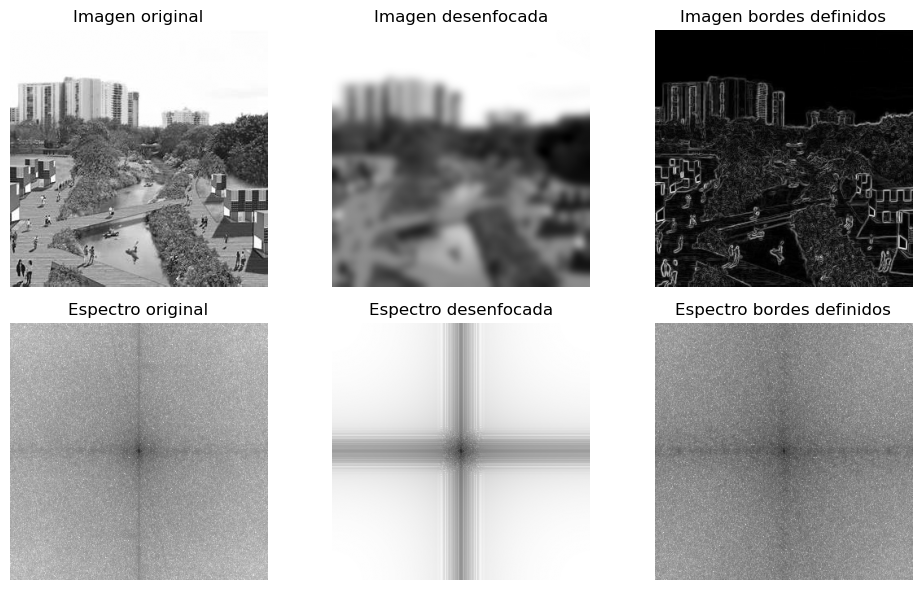

In [13]:
from scipy.ndimage import gaussian_filter, sobel

# Desenfocar la imagen (filtro gaussiano)
img_blur = gaussian_filter(img_gray, sigma=5)

# Definir bordes (filtro Sobel)
img_edges = np.hypot(sobel(img_gray, axis=0), sobel(img_gray, axis=1))

# Espectro de magnitud de la imagen desenfocada
f_blur = np.fft.fft2(img_blur)
fshift_blur = np.fft.fftshift(f_blur)
magnitude_blur = np.log(np.abs(fshift_blur) + 1)

# Espectro de magnitud de la imagen de bordes
f_edges = np.fft.fft2(img_edges)
fshift_edges = np.fft.fftshift(f_edges)
magnitude_edges = np.log(np.abs(fshift_edges) + 1)

plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_blur, cmap='gray')
plt.title('Imagen desenfocada')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagen bordes definidos')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(magnitude_spectrum, cmap='gray_r')
plt.title('Espectro original')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(magnitude_blur, cmap='gray_r')
plt.title('Espectro desenfocada')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(magnitude_edges, cmap='gray_r')
plt.title('Espectro bordes definidos')
plt.axis('off')

plt.tight_layout()
plt.show()

### Inciso h)

> ¿Qué ocurre si aplicamos un filtro de forma circular o rectangular en el espectro? ¿Cómo cambia la imagen? Ejercicio sugerido: Implementar máscaras ideales de paso bajo y paso alto circulares y cuadradas, y observar sus efectos.

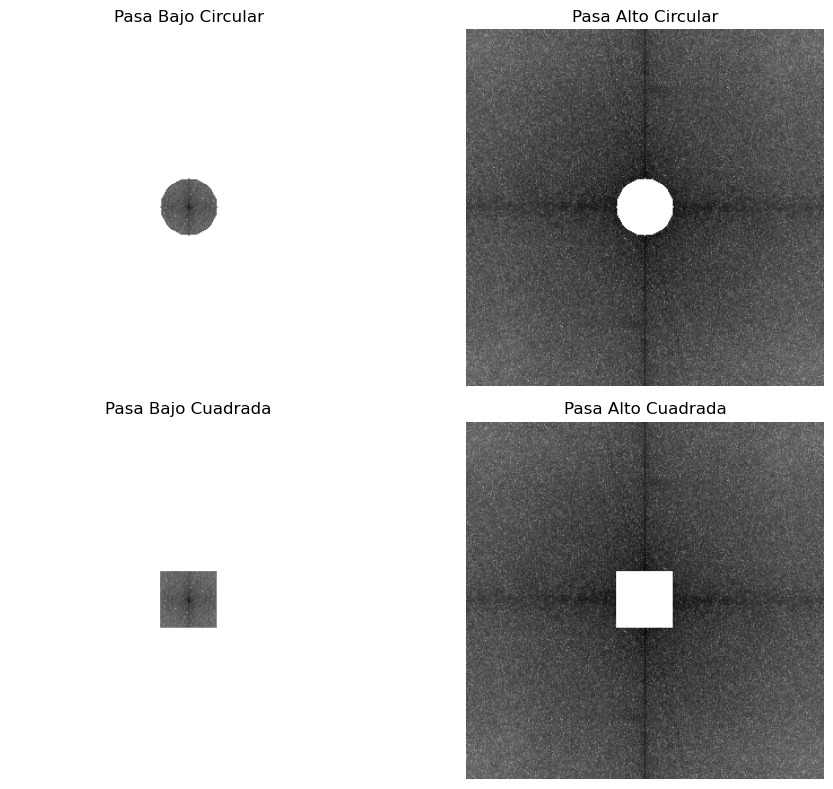

In [14]:
# Parámetros
rows, cols = img_gray.shape
crow, ccol = rows // 2, cols // 2
radio = 25  # radio para máscaras circulares
lado = 50   # lado para máscaras cuadradas

# Máscara circular pasa baja
mask_circ_lp = np.zeros((rows, cols), np.uint8)
Y, X = np.ogrid[:rows, :cols]
dist_from_center = np.sqrt((X - ccol)**2 + (Y - crow)**2)
mask_circ_lp[dist_from_center <= radio] = 1

# Máscara circular pasa alta
mask_circ_hp = np.ones((rows, cols), np.uint8)
mask_circ_hp[dist_from_center <= radio] = 0

# Máscara cuadrada pasa baja
mask_sq_lp = np.zeros((rows, cols), np.uint8)
mask_sq_lp[crow-lado//2:crow+lado//2, ccol-lado//2:ccol+lado//2] = 1

# Máscara cuadrada pasa alta
mask_sq_hp = np.ones((rows, cols), np.uint8)
mask_sq_hp[crow-lado//2:crow+lado//2, ccol-lado//2:ccol+lado//2] = 0

# Aplicar máscaras en el dominio de la frecuencia
fshift = np.fft.fftshift(np.fft.fft2(img_gray))

f_circ_lp = fshift * mask_circ_lp
f_circ_hp = fshift * mask_circ_hp
f_sq_lp = fshift * mask_sq_lp
f_sq_hp = fshift * mask_sq_hp

# Espectros de magnitud
mag_circ_lp = np.log(np.abs(f_circ_lp) + 1)
mag_circ_hp = np.log(np.abs(f_circ_hp) + 1)
mag_sq_lp = np.log(np.abs(f_sq_lp) + 1)
mag_sq_hp = np.log(np.abs(f_sq_hp) + 1)

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(mag_circ_lp, cmap='gray_r')
plt.title('Pasa Bajo Circular')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mag_circ_hp, cmap='gray_r')
plt.title('Pasa Alto Circular')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(mag_sq_lp, cmap='gray_r')
plt.title('Pasa Bajo Cuadrada')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(mag_sq_hp, cmap='gray_r')
plt.title('Pasa Alto Cuadrada')
plt.axis('off')

plt.tight_layout()
plt.show()

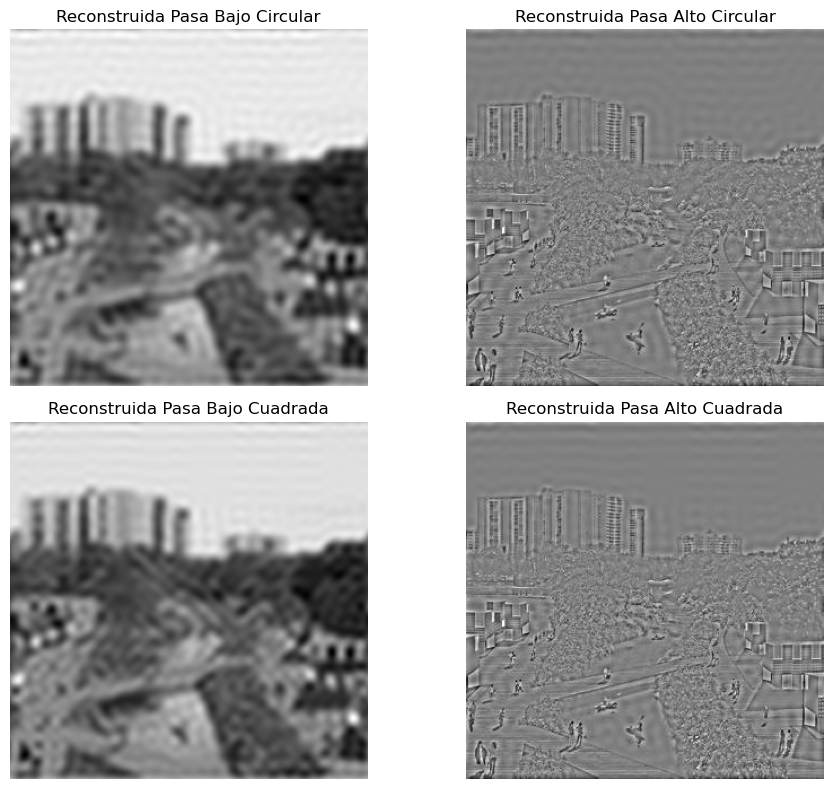

In [15]:
# Reconstrucción de imágenes a partir de los espectros enmascarados

# Pasa bajo circular
img_circ_lp = np.fft.ifft2(np.fft.ifftshift(f_circ_lp))
img_circ_lp = np.real(img_circ_lp)

# Pasa alto circular
img_circ_hp = np.fft.ifft2(np.fft.ifftshift(f_circ_hp))
img_circ_hp = np.real(img_circ_hp)

# Pasa bajo cuadrada
img_sq_lp = np.fft.ifft2(np.fft.ifftshift(f_sq_lp))
img_sq_lp = np.real(img_sq_lp)

# Pasa alto cuadrada
img_sq_hp = np.fft.ifft2(np.fft.ifftshift(f_sq_hp))
img_sq_hp = np.real(img_sq_hp)

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_circ_lp, cmap='gray')
plt.title('Reconstruida Pasa Bajo Circular')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_circ_hp, cmap='gray')
plt.title('Reconstruida Pasa Alto Circular')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img_sq_lp, cmap='gray')
plt.title('Reconstruida Pasa Bajo Cuadrada')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_sq_hp, cmap='gray')
plt.title('Reconstruida Pasa Alto Cuadrada')
plt.axis('off')

plt.tight_layout()
plt.show()

### Inciso i)

> ¿Cuál es la relación entre el patrón de una imagen (orientación, repetición) y la simetría del espectro? Ejercicio sugerido: Usar imágenes diagonales o repetitivas y analizar la simetría del espectro.

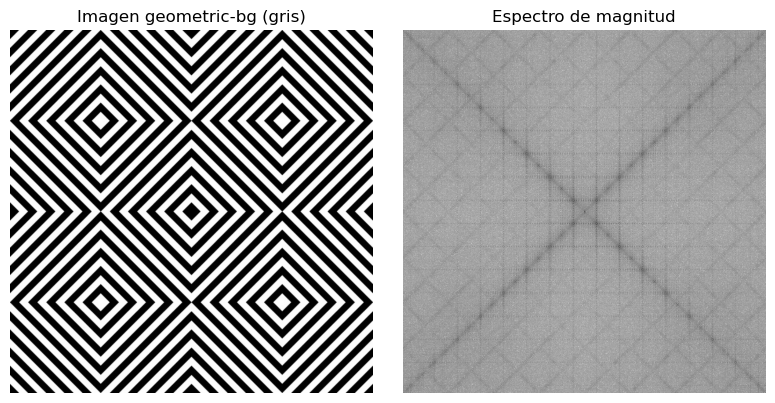

In [16]:
# Cargar la imagen "geometric-bg.jpg" y convertirla a escala de grises
img_geo = imread('imagenes/geometric-bg.jpg')
if img_geo.ndim == 3:
    img_geo_gray = np.dot(img_geo[..., :3], [0.2989, 0.5870, 0.1140])
else:
    img_geo_gray = img_geo

# Calcular la transformada de Fourier y el espectro de magnitud
f_geo = np.fft.fft2(img_geo_gray)
fshift_geo = np.fft.fftshift(f_geo)
magnitude_geo = np.log(np.abs(fshift_geo) + 1)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_geo_gray, cmap='gray')
plt.title('Imagen geometric-bg (gris)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_geo, cmap='gray_r')
plt.title('Espectro de magnitud')
plt.axis('off')

plt.tight_layout()
plt.show()

### Inciso j)

> ¿Cómo puede usarse el dominio frecuencial para eliminar ruido periódico en una imagen? Ejercicio sugerido: Introducir ruido periódico artificialmente y diseñar un filtro para suprimirlo en el dominio de la frecuencia.

In [61]:
from PIL import Image

# Load the image
image_path = "imagenes/Lenna.png"
image = Image.open(image_path).convert("RGB")

# Convert image to numpy array
image_np = np.array(image)

# Introduce periodic white lines every 20 columns
image_with_noise = image_np.copy()
for col in range(0, image_with_noise.shape[1], 20):
    image_with_noise[:, col] = 0


# Convert back to image
noisy_image = Image.fromarray(image_with_noise)

output_path = "imagenes/Lenna_periodic_noise.png"
noisy_image.save(output_path)

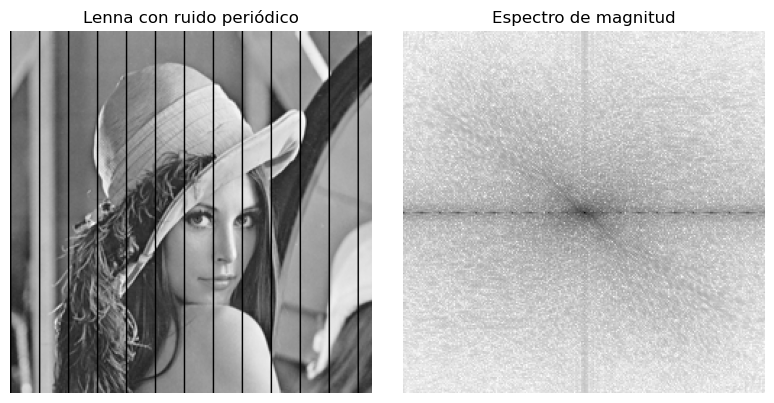

In [62]:
# Cargar la imagen Lenna y convertirla a escala de grises
img_lenna_ruido = imread('imagenes/Lenna_periodic_noise.png')

if img_lenna_ruido.ndim == 3:
    img_lenna_ruido = np.dot(img_lenna_ruido[..., :3], [0.2989, 0.5870, 0.1140])

# Espectro de magnitud de la imagen con ruido
f_lenna_ruido = np.fft.fft2(img_lenna_ruido)
fshift_lenna_ruido = np.fft.fftshift(f_lenna_ruido)
magnitude_lenna_ruido = np.log(np.abs(fshift_lenna_ruido) + 1)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_lenna_ruido, cmap='gray')
plt.title('Lenna con ruido periódico')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_lenna_ruido, cmap='gray_r')
plt.title('Espectro de magnitud')
plt.axis('off')

plt.tight_layout()
plt.show()

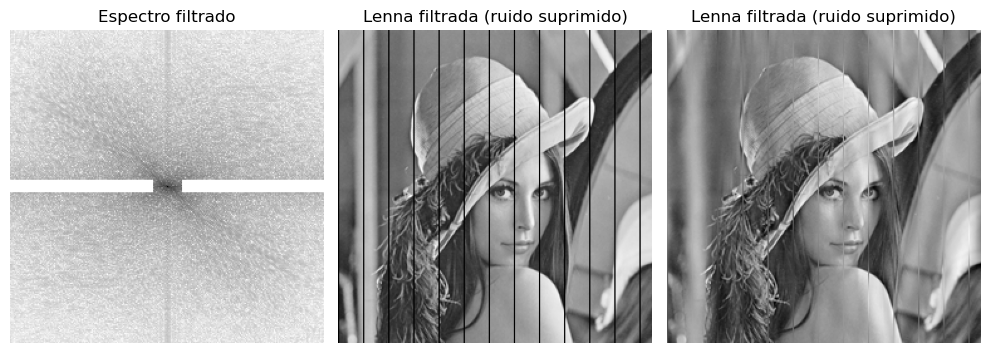

In [73]:
# Crear una copia de la transformada de Fourier desplazada
fshift_filtered = fshift_lenna_ruido.copy()

# Crear una máscara que suprima la línea horizontal central excepto el centro
mask = np.ones_like(fshift_lenna_ruido)
rows, cols = mask.shape
crow, ccol = rows // 2, cols // 2

# Suprimir la fila central excepto el centro (por ejemplo, 5 píxeles alrededor del centro se conservan)
width = 11  # ancho de la región central a conservar
height = 5  # altura de la región central a conservar
mask[crow-height:crow+height, :] = 0
mask[crow-height:crow+height, ccol-width:ccol+width+1] = 1

# Aplicar la máscara
fshift_filtered = fshift_lenna_ruido * mask

# Reconstruir la imagen filtrada
img_filtered = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
img_filtered = np.real(img_filtered)

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(np.log(np.abs(fshift_filtered) + 1), cmap='gray_r')
plt.title('Espectro filtrado')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_lenna_ruido, cmap='gray')
plt.title('Lenna filtrada (ruido suprimido)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_filtered, cmap='gray')
plt.title('Lenna filtrada (ruido suprimido)')
plt.axis('off')
plt.tight_layout()
plt.show()

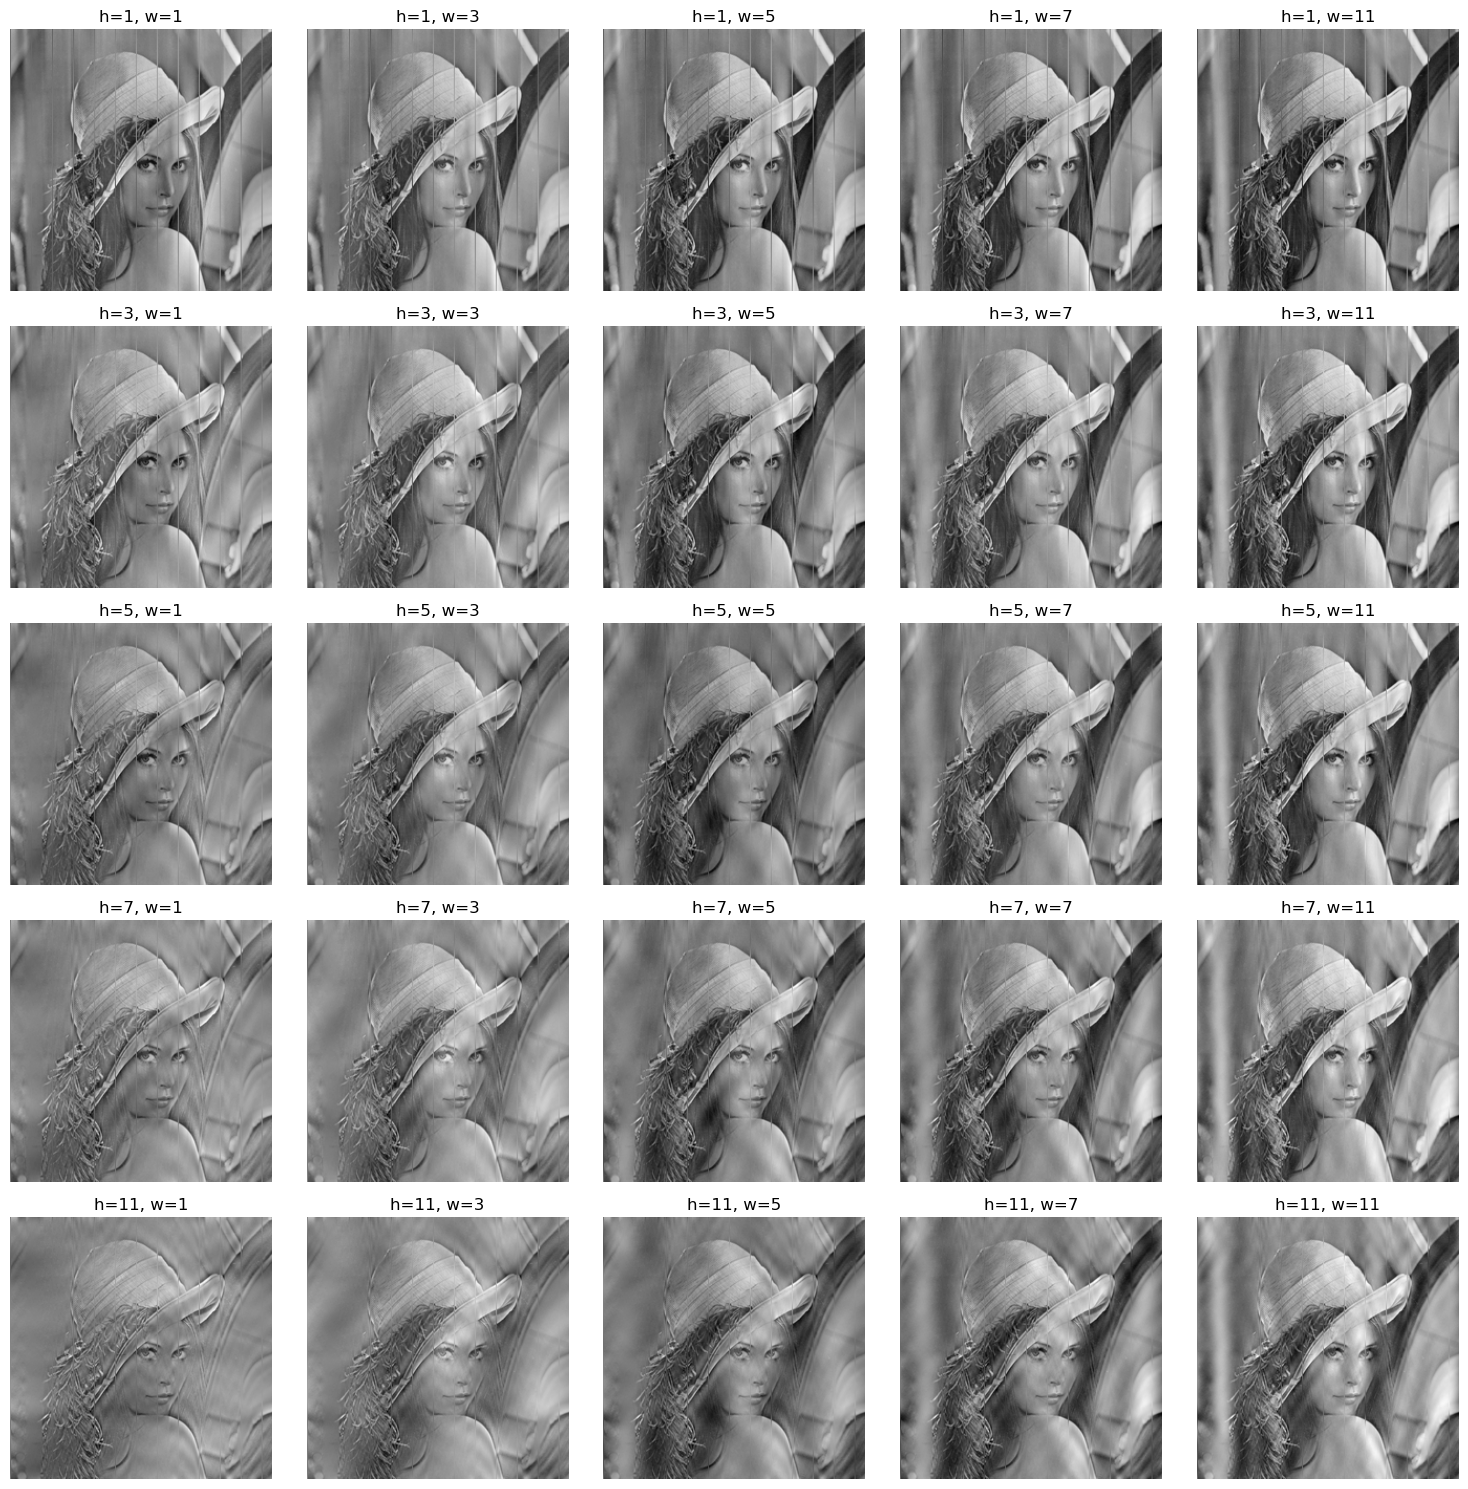

In [72]:
# Probar con 5 valores diferentes de height y width para la máscara de supresión de ruido periódico
heights = [1, 3, 5, 7, 11]
widths = [1, 3, 5, 7, 11]

plt.figure(figsize=(15, 15))

for i, h in enumerate(heights):
    for j, w in enumerate(widths):
        # Crear una nueva máscara para cada combinación
        mask_test = np.ones_like(fshift_lenna_ruido)
        crow, ccol = rows // 2, cols // 2
        mask_test[crow-h:crow+h+1, :] = 0
        mask_test[crow-h:crow+h+1, ccol-w:ccol+w+1] = 1

        # Aplicar la máscara y reconstruir la imagen
        fshift_filtered_test = fshift_lenna_ruido * mask_test
        img_filtered_test = np.fft.ifft2(np.fft.ifftshift(fshift_filtered_test))
        img_filtered_test = np.real(img_filtered_test)

        # Mostrar la imagen filtrada
        plt.subplot(5, 5, i*5 + j + 1)
        plt.imshow(img_filtered_test, cmap='gray')
        plt.title(f'h={h}, w={w}')
        plt.axis('off')

plt.tight_layout()
plt.show()